## 1.  Importing the data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Unnamed: 15
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,NaN
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,NaN
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,NaN
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,NaN
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,NaN


## 2. Getting a basic outline of the data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
 15  Unnamed: 15  0 non-null      float64
dtypes: bool(2), float64(3), int64(4), object(7)
memory usage: 99.3+ KB


In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'Unnamed: 15'],
      dtype='object')

In [5]:
df.shape # There 891 rows and 16 columns (features)in this dataframe 

(891, 16)

In [6]:
df.size

14256

In [7]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Unnamed: 15
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,NaN
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,NaN
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,NaN
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,NaN


In [8]:
df.ndim

2

In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,Unnamed: 15
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,0.0
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,NaN
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,NaN


In [10]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
Unnamed: 15      0
dtype: int64

## 3. Treating for missing values 

In [11]:
df.drop("Unnamed: 15", axis = 1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [13]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
# Percentage of missing values


df.isnull().sum()/len(df)*100 #age, and deck has the largest number of missing values embarked and embarked town has lesser ones

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

C:\Users\laksh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

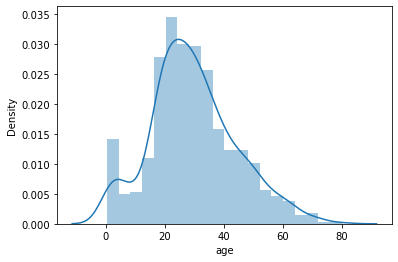

In [15]:
# We will check if distribution of the variable age is normal to find if we need to impute mean or median 

# As this dsitrbution is not normal, we will impute median 

sns.distplot(df["age"])

In [16]:
# Let's impute the age missing values with median 

df["age"] = df["age"].fillna(df["age"].median())

In [17]:
df["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [18]:
df["embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [19]:
# As we checked the mode of embarked, we find that Southampton as the maximum number of repeated category 

df["embarked"].mode()

0    S
dtype: object

In [90]:
# Let's impute the missing value here with S


df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [91]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [22]:
# Let's look the mode of embark town and it shows Southampton 

df["embark_town"].mode()

0    Southampton
dtype: object

In [23]:
# Let's impute the missing values of embark_town with mode 

df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

In [24]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [25]:
# There are more number of missing values for deck 

In [26]:
# Let's look more into deck 

df["deck"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [27]:
df["deck"].mode()

0    C
dtype: object

In [28]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [29]:
# Let us drop the columns deck 

df.drop("deck", inplace=True, axis=1)

In [30]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


In [149]:
# Let us convert survived into an object variable. But before that, let's label it as survived and not survived 

df["survived"] = df["survived"].astype(str)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    object 
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(7)
memory usage: 85.4+ KB


In [151]:
# Let us convert pclass into an object variables 

df["pclass"] = df["pclass"].astype(str)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    object 
 1   pclass       891 non-null    object 
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 85.4+ KB


In [31]:
# Now we have removed all missing values. let us do some Exploratory Data Analysis 

## Exploratory Data Analysis 

In [157]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [158]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [159]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
embark_town      3
alive            2
alone            2
dtype: int64

### 1. What are the percentage of people who survived and did not survive? 

In [160]:
df["survived"].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: survived, dtype: float64

In [161]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

Text(0.5, 1.0, 'How many did not survive 0 vs How many survived 1')

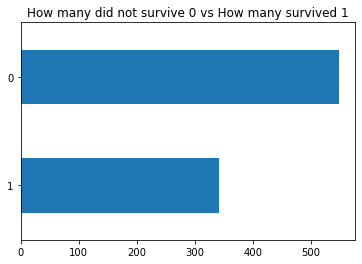

In [162]:
df["survived"].value_counts().sort_index(ascending=False).plot(kind = "barh")


plt.title("How many did not survive 0 vs How many survived 1")

#### This shows that 61.6% (549) of people did not survive and 38.3% (342) people survived in this titanic disaster

### 2. What are the percentage of each passenger class in this titanic dataset?

In [38]:
df["pclass"].value_counts(normalize=True)*100

3    55.106622
1    24.242424
2    20.650954
Name: pclass, dtype: float64

In [39]:
perc_pass = df["pclass"].value_counts(normalize=True)*100

In [40]:
df["class"].value_counts(normalize=True)*100

Third     55.106622
First     24.242424
Second    20.650954
Name: class, dtype: float64

array([<AxesSubplot:ylabel='pclass'>], dtype=object)

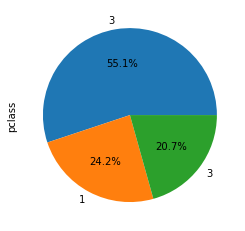

In [41]:
perc_pass.plot(kind = "pie", subplots="True", labels = df["pclass"], autopct='%.1f%%')

#### Percentages of each passenger class

- The third passenger class is highest in percentage in the titanic ship and number with 55.1% and 
- The 1st class passengers were 24.2% and 
- The second class passengers were 20.6% percentage in the titanic ship

### 3. Which age group was larger in percentage and number in titanic ship?

In [42]:
df["age"].value_counts(normalize=True)*100

28.00    22.671156
24.00     3.367003
22.00     3.030303
18.00     2.918070
19.00     2.805836
           ...    
55.50     0.112233
74.00     0.112233
0.92      0.112233
70.50     0.112233
12.00     0.112233
Name: age, Length: 88, dtype: float64

In [43]:
perc_age = df["age"].value_counts(normalize=True)*100

In [163]:
x = df["age"]

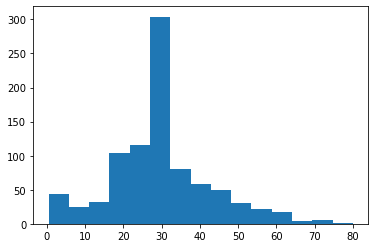

In [165]:
plt.hist(x, bins=15)
plt.show()

In [ ]:
# We could see that the data is highly distributed for people within the age of 28 to 30

#### The people in the age group of 28 are higher in terms of percentage or numbers with 22.6%

### 4. Were there more females or males in titanic ship?

In [166]:
df["sex"].value_counts(normalize=True)*100

male      64.758698
female    35.241302
Name: sex, dtype: float64

In [46]:
perc_sex = df["sex"].value_counts(normalize=True)*100

array([<AxesSubplot:ylabel='sex'>], dtype=object)

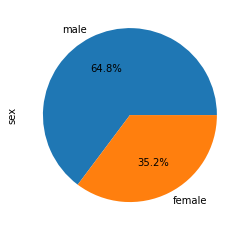

In [47]:
perc_sex.plot(kind = "pie", subplots="True", labels = df["sex"], autopct='%.1f%%')

#### There are more males than females in titanic and males are the highest in percentage with 64.7% and female with 35.2% 

### 5. How many adult males were there in the Titanic ship and how much are they in percentage to total men?

In [48]:
df["adult_male"].value_counts()

True     537
False    354
Name: adult_male, dtype: int64

In [49]:
df["adult_male"].value_counts(normalize=True)*100

True     60.26936
False    39.73064
Name: adult_male, dtype: float64

In [50]:
perc_adult_male = df["adult_male"].value_counts(normalize=True)*100

array([<AxesSubplot:ylabel='adult_male'>], dtype=object)

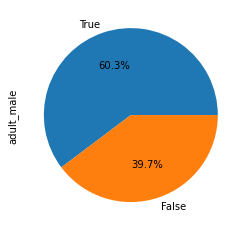

In [51]:
perc_adult_male.plot(kind = "pie", subplots="True", labels = df["adult_male"], autopct='%.1f%%')

#### There are total 537 adult males and the adult males were 60.2% compared to total males. This shows they are a large chunk.

### 6. Where did most travellers mount from? 

In [52]:
df["embarked"].value_counts(normalize=True)*100

S    72.502806
C    18.855219
Q     8.641975
Name: embarked, dtype: float64

In [53]:
df["embark_town"].value_counts(normalize=True)*100

Southampton    72.502806
Cherbourg      18.855219
Queenstown      8.641975
Name: embark_town, dtype: float64

In [54]:
perc_embark_town = df["embark_town"].value_counts(normalize=True)*100

array([<AxesSubplot:ylabel='embark_town'>], dtype=object)

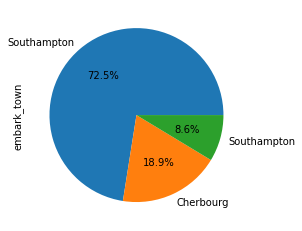

In [55]:
perc_embark_town.plot(kind = "pie", subplots="True", labels = df["embark_town"], autopct='%.1f%%')

#### Most travellers 72.5% mount from Southampton followed by Cherbourg and Queenstown

### 7. How much percentage of people travelled without a sibling or spouse in Titanic?

In [56]:
df["sibsp"].value_counts(normalize=True)*100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: sibsp, dtype: float64

In [57]:
perc_sibsp = df["sibsp"].value_counts(normalize=True)*100

In [173]:
x = perc_sibsp

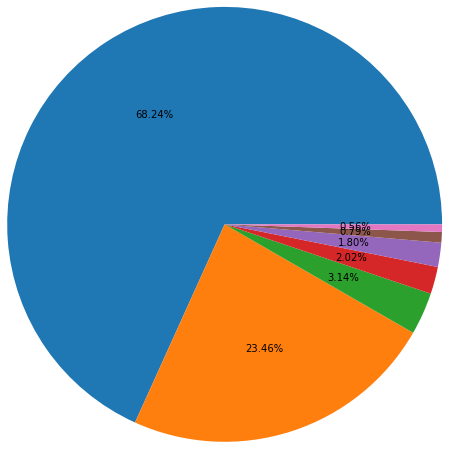

In [181]:
plt.figure(figsize = (3,2))

plt.pie(x, autopct = "%0.2f%%", radius = 5)

plt.show()

#### 68% of passengers travelled without a sibling or spouse in titanic ship and 23.5% had atleast a sibling or a spouse travelling with them

### 9. What was the total fare, average fare, minimum and maximum fare collected from titanic?

In [59]:
df["fare"].max()

512.3292

In [60]:
df["fare"].min()

0.0

In [61]:
df["fare"].mean()

32.2042079685746

In [62]:
df["fare"].sum()

28693.9493

#### The maximum fare collected was 512.32 British Pounds, Min fare was 0, Average fare was 32 british pounds and total fare collected was 28694 pounds

### 10. How many man, women and child were there in the titanic ship and how many percent were they? 

In [63]:
df["who"].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [64]:
df["who"].value_counts(normalize=True)*100

man      60.269360
woman    30.415264
child     9.315376
Name: who, dtype: float64

In [65]:
perc_who = df["who"].value_counts(normalize=True)*100

<AxesSubplot:ylabel='who'>

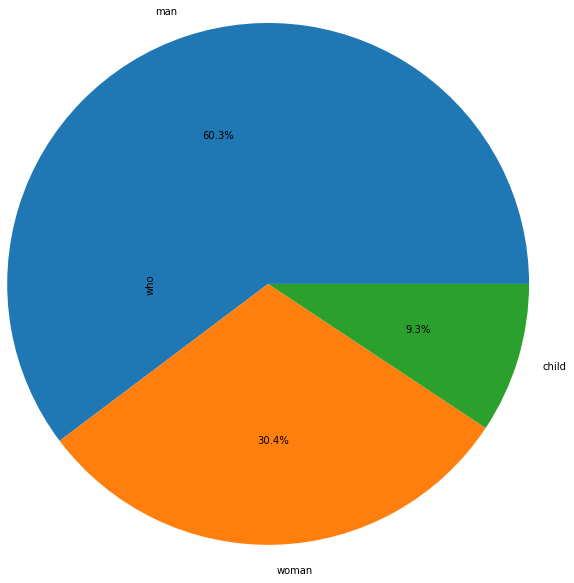

In [183]:
perc_who.plot(kind = "pie", autopct = '%.1f%%', radius = 3)

#### Taking into account men, women and children in Titanic Ship, we find out the there are 

- 60.3% men
- 30.4% women
- 9.3% children 



### 11. Correlation: What variables are highly and minimally correlated?

In [98]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

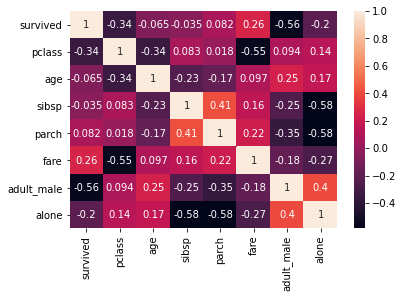

In [100]:
sns.heatmap(df.corr(), annot =True)

#### Results I got 

- The parch and sibsp have a high correlation of 0.41
- Fare and survived have a high correlation of 0.25
- The adult male and alone have high correlation of 0.40
- Age and alone have a lower positive correlation
- Age and pclass have a comparitively lower posititive correlation

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


## 12. Is there any significant relationship between passenger class and those who survived? and sibsp, age and fare? 

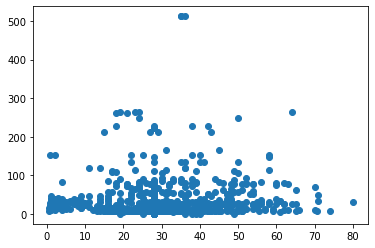

In [102]:
plt.scatter(df["age"], df["fare"])
plt.show()

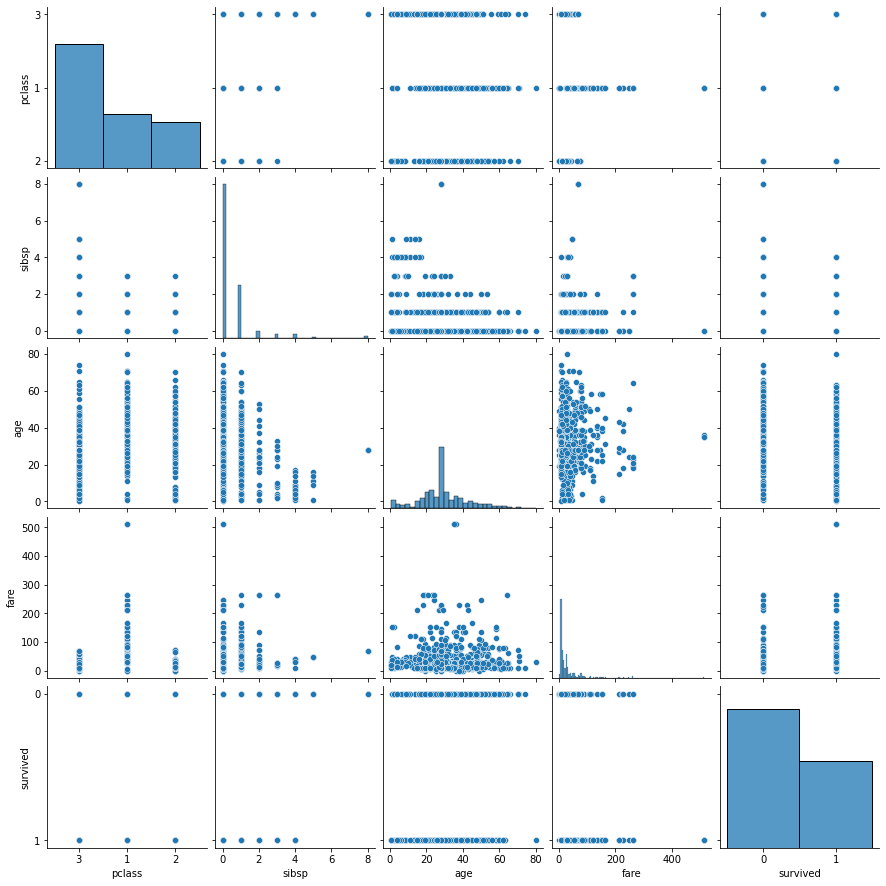

In [185]:
sns.pairplot(data=df, vars =["pclass", "sibsp", "age", "fare", "survived"])
plt.show()

### From these above visualizations, it's quite clear that there are no sigificant differences between these variables

In [103]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 12. What is the average ticket price of passengers based on where they mounted from? 

In [104]:
df.groupby("embark_town")["fare"].mean()

embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.243651
Name: fare, dtype: float64

<AxesSubplot:xlabel='embark_town'>

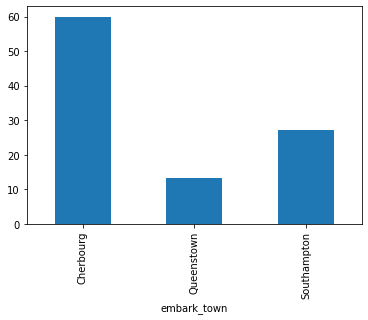

In [187]:
df.groupby("embark_town")["fare"].mean().plot.bar()

#### The average ticket price of passengers was higher in Cherbourg at 59.95 and Southampton had higher mean ticket price at 27.2

### 13. Who paid a higher ticket price on an average? Male or Female?

In [105]:
df.groupby("sex")["fare"].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

<AxesSubplot:xlabel='sex'>

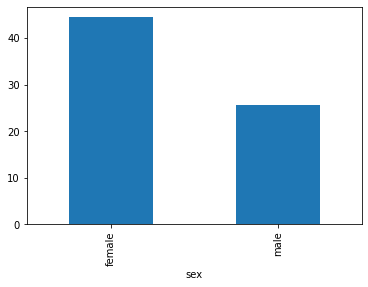

In [188]:
df.groupby("sex")["fare"].mean().plot.bar()

#### Women paid a higher average ticket price than men. Women paid 44.7 pounds and men paid 25.52. Quite high though! 

### 14. What are the average ticket prices of each passenger class? 

In [189]:
df.groupby("class")["fare"].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

<AxesSubplot:xlabel='class'>

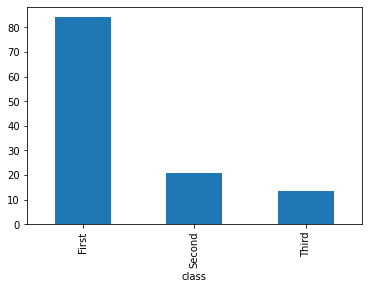

In [190]:
df.groupby("class")["fare"].mean().plot.bar()

#### Average ticket prices for all the three class passengers 

- First   -  84.154687
- Second  -  20.662183
- Third   -  13.675550

### 15. How many men and women paid a fare of above 50 pounds in titanic ship?

In [192]:
men = df[df["sex"]=="male"]

In [194]:
len(men[df["fare"]>50])

<ipython-input-194-f12d9e7a8178>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(men[df["fare"]>50])


73

In [195]:
women = df[df["sex"]=="female"]

In [197]:
len(women[df["fare"]>50])

<ipython-input-197-11646878892c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(women[df["fare"]>50])


87

#### Totally, 73 men paid more than 50 pounds for ticket price and 87 women paid more than 50 pounds for titanic ticket price

### 16. What is the average age of each passenger class? and which passenger class has the least average age?

In [200]:
df.groupby("class")["age"].mean()

class
First     36.812130
Second    29.765380
Third     25.932627
Name: age, dtype: float64

<AxesSubplot:xlabel='class'>

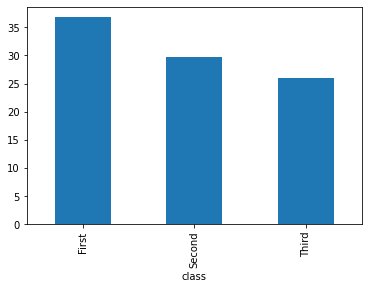

In [201]:
df.groupby("class")["age"].mean().plot.bar()

#### The third class passengers have a least average age of 25.9. The average age of all three passenger class are listed below


- First   :   36.812130
- Second  :   29.765380
- Third   :   25.932627

### 17. What is the average age of passengers from each embark town?

In [216]:
df.groupby("embark_town")["age"].mean()

embark_town
Cherbourg      30.178095
Queenstown     28.032468
Southampton    29.307663
Name: age, dtype: float64

<AxesSubplot:xlabel='embark_town'>

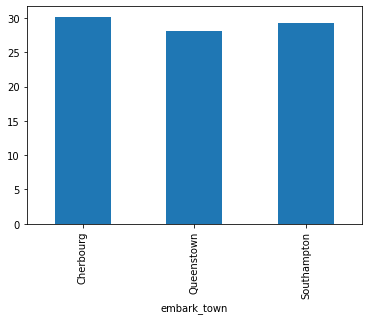

In [217]:
df.groupby("embark_town")["age"].mean().plot.bar()

#### The average age of each embark town are 

- Cherbourg   :   30.178095
- Queenstown  :   28.032468
- Southampton  :  29.307663

### 18. How many people traveling in Titanic does not have parents of children traveling with them? 

In [223]:
df["parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

<AxesSubplot:>

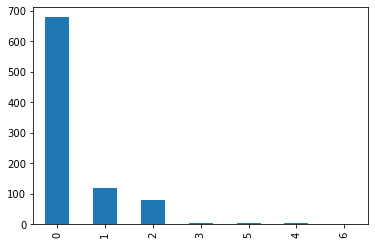

In [224]:
df["parch"].value_counts().plot.bar()

#### Totally, 678 passengers aren't traveling with parents or children in Titanic. 

### 19. Is the average fare paid by those travelling without parents or children higher than the rest traveling with parents or children?

In [226]:
df.groupby("parch")["fare"].mean()

parch
0    25.586774
1    46.778180
2    64.337604
3    25.951660
4    84.968750
5    32.550000
6    46.900000
Name: fare, dtype: float64

<AxesSubplot:xlabel='parch'>

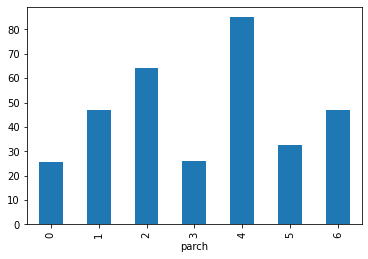

In [227]:
df.groupby("parch")["fare"].mean().plot.bar()

#### This is just an assumption. Those traveling with no parents or children in titanic paid the least average fare compared to those travelling with parents and children.

### 20. What is the average age of those who are alive and not alive after titanic shipwreck? 

In [229]:
df.groupby("alive")["age"].mean()

alive
no     30.028233
yes    28.291433
Name: age, dtype: float64

In [230]:
df.groupby("survived")["age"].mean()

survived
0    30.028233
1    28.291433
Name: age, dtype: float64

<AxesSubplot:xlabel='alive'>

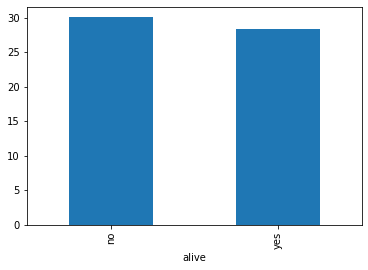

In [231]:
df.groupby("alive")["age"].mean().plot.bar()

#### This average age of those were alive was 28 and those who were not alive was 30. This shows that age difference does not play a signficant role in being alive

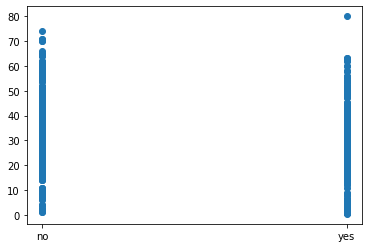

In [232]:
plt.scatter(df["alive"], df["age"])
plt.show() # This visualization shows that people of all age groups have survived and died. So, age has no bearing for survival

## 21. Find out the highest fare paid by male and female and where they embarked from

In [234]:
men = df[df["sex"]=="male"]

In [235]:
women = df[df["sex"]=="female"]

In [237]:
men.sort_values(by="fare", ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,Cherbourg,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,Southampton,no,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,Southampton,no,False
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,Cherbourg,no,False


In [238]:
women.sort_values(by="fare", ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,Cherbourg,yes,True
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,Southampton,yes,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,Southampton,yes,False
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,Cherbourg,yes,False
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,Cherbourg,yes,False


#### The highest fare paid by both male and female is 512.3292 and is the same. Both male and female who paid the highest fare embarked from Cherbourg

### 22. What was the average age fare of those who survived and those who did not? 

In [242]:
df.groupby("alive")["fare"].mean()

alive
no     22.117887
yes    48.395408
Name: fare, dtype: float64

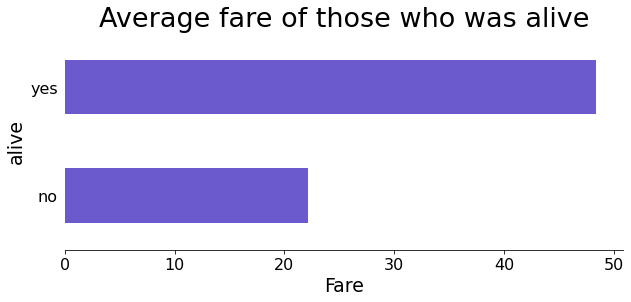

In [255]:
plt.figure(figsize=(10,4))

df.groupby("alive")["fare"].mean().plot.barh(color='slateblue')

plt.title('Average fare of those who was alive', fontsize=27)
plt.xlabel('Fare', fontsize=19)
plt.ylabel("alive", fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(left=False)
sns.despine(left=True)
plt.show()

#### The average fare paid by those who survived were 48.3 and those who did not survive was 22.1

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    object 
 1   pclass       891 non-null    object 
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 85.4+ KB


### 23. Who turned out to be alive after Titanic Shipwreck: Men or women?

In [253]:
result = pd.crosstab(df["alive"], df["sex"], margins =True)
result

sex,female,male,All
alive,,,
no,81,468,549
yes,233,109,342
All,314,577,891


<Figure size 720x288 with 0 Axes>

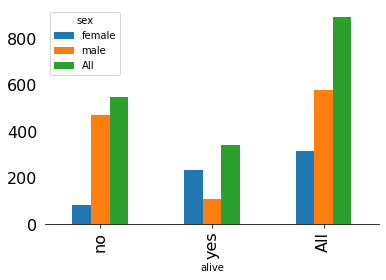

In [266]:
plt.figure(figsize=(10,4))

result.plot.bar()

plt.xlabel("alive", fontsize = 10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(left=False)
sns.despine(left=True)
plt.show()

### The following analysis shows females survived more than males in titanic shipwreck. Female were 233 and male were just 109 

### 24. Draw a pivot table of average fare prices of first, second and third class passengers from different embark towns

In [126]:
result = pd.pivot_table(data=df, index='embark_town', columns='pclass',values='fare',  aggfunc='mean')
print(result)


pclass                1          2          3
embark_town                                  
Cherbourg    104.718529  25.358335  11.214083
Queenstown    90.000000  12.350000  11.183393
Southampton   70.514244  20.327439  14.644083


### 25. Draw a pivot table of survival of male and female and children with their mean age

In [273]:
result = pd.pivot_table(data=df, index = "who", columns = "alive", values="age", aggfunc="mean")
print(result)

alive         no        yes
who                        
child   7.220588   5.778980
man    31.785078  32.965909
woman  29.825758  31.665854


### 26. Draw a Pivot table of average ticket fare of male, female and children in each passenger class

In [276]:
result = pd.pivot_table(data=df, index='who', columns='class',values='fare',  aggfunc='mean')
print(result)

class       First     Second      Third
who                                    
child  139.382633  28.323905  23.220190
man     65.951086  19.054124  11.340213
woman  104.317995  20.868624  15.354351
